<a href="https://colab.research.google.com/github/aelshehawy/PythonSocialDataScience/blob/main/Session_4_Python23_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today's session:


1. Revise Excercises from last week
2. Loading in data to Python
3. Pandas Operations
4. Data Visualization




---

<br>
<br>
**Fast repition of Looping, strings & lists**

In [ ]:
#we want to start with a single string object - once we write sth we like, we scale up 
s1="Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and"
print(s1)

Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and


In [ ]:
# we define a list of women-related words - we put in Iraq. to make sure the test works (we will drop it later)
female_dict=["woman","women","female","girl","girls","Iraq."]

In [ ]:
# empty list for all women-related things mentions
all_women=[]

# we will loop over our femal dict list -> each time, the list comprehension will loop over s1 and add to all_women
# all instances in which that particular word from female dictionary was found.  Note that .extend takes the elements 
# of a new list and adds them to an existing list as individual elements, not as new list-element (producing nested lists)
# as .append would - experiment with .append! 

for word in female_dict:
    all_women.extend([x for x in s1.split() if x==word])

In [ ]:
all_women

['Iraq.']

In [ ]:
# empty list for all women-related things mentions
all_women=[]
all_women2=[]

# we will loop over our femal dict list -> each time, the list comprehension will loop over s1 and add to all_women
# all instances in which that particular word from female dictionary was found.  

#Note that .extend takes the elements 
# of a new list and adds them to an existing list as individual elements, not as new list-element (producing nested lists)
# as .append would - experiment with .append! 

for word in female_dict:
    all_women.append([x for x in s1.split() if x==word])

for word in female_dict:
    all_women2.extend([x for x in s1.split() if x==word])   


# Loading Data in Python

- First thing to think about is to specifcy the working directory. I am going to show you how to do that
- we want to open the file obamaincairo.txt - This is a famous speech that Obama gave at Cairo University, was discussed a lot in Egyptian Media.

**In general we want to learn how to:**

``Open, read, save in var, close``

## This is the basic syntax to open python file 
```file_object  = open("filename", "mode") ```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', encoding="utf-8") #open files in read mode

In [ ]:
obamafile # we see we can not read the text, we just can see where it is located

<_io.TextIOWrapper name='/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt' mode='r' encoding='utf-8'>

In [ ]:
obamafile.close() # we close the file that we have opened

We can see that the **default mode here is r** - read mode

In [ ]:
obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt',"r") #open files in read mode

In [ ]:
obamafile # we see the same outcome

<_io.TextIOWrapper name='/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt' mode='r' encoding='UTF-8'>

In [ ]:
obamafile.close() 

## How do we print content then?



In [ ]:
obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', "r", encoding="utf-8") #open files
content = obamafile.read() # this reads in the file and saves it in a variable
print(content)
obamafile.close()

PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)
We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by colonialism th

In [ ]:
print(type(content))

<class 'str'>


## How do we split by word? (Naive Tokenization)

We use **the split function**, we talked about in the Python Refresher

What is a problem that we can spot here?

In [ ]:
obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', "r") #open files
content = obamafile.read() # this reads in the file
words = content.split(" ")
print (words) # we see here it puts every word in a list, including white spaces

['PRESIDENT', 'OBAMA:', '', 'Thank', 'you', 'very', 'much.', '', 'Good', 'afternoon.', '', 'I', 'am', 'honored', 'to', 'be', 'in', 'the', 'timeless', 'city', 'of', 'Cairo,', 'and', 'to', 'be', 'hosted', 'by', 'two', 'remarkable', 'institutions.', '', 'For', 'over', 'a', 'thousand', 'years,', 'Al-Azhar', 'has', 'stood', 'as', 'a', 'beacon', 'of', 'Islamic', 'learning;', 'and', 'for', 'over', 'a', 'century,', 'Cairo', 'University', 'has', 'been', 'a', 'source', 'of', "Egypt's", 'advancement.', '', 'And', 'together,', 'you', 'represent', 'the', 'harmony', 'between', 'tradition', 'and', 'progress.', '', "I'm", 'grateful', 'for', 'your', 'hospitality,', 'and', 'the', 'hospitality', 'of', 'the', 'people', 'of', 'Egypt.', '', 'And', "I'm", 'also', 'proud', 'to', 'carry', 'with', 'me', 'the', 'goodwill', 'of', 'the', 'American', 'people,', 'and', 'a', 'greeting', 'of', 'peace', 'from', 'Muslim', 'communities', 'in', 'my', 'country:', '', 'Assalaamu', 'alaykum.', '(Applause.)\nWe', 'meet', 'at'

Check the words "mistrust.\nSo" & "Islam.\nViolent" -- these are problems that we need to take care of in cleaning steps.

**What can we do then to avoid this?**

same, but using a loop, what is the main difference here?


In [ ]:
#recognition of paragraph end. (\n)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', 'r') as f:
    for word in f:
        y = word.split()
        print(y) 

['PRESIDENT', 'OBAMA:', 'Thank', 'you', 'very', 'much.', 'Good', 'afternoon.', 'I', 'am', 'honored', 'to', 'be', 'in', 'the', 'timeless', 'city', 'of', 'Cairo,', 'and', 'to', 'be', 'hosted', 'by', 'two', 'remarkable', 'institutions.', 'For', 'over', 'a', 'thousand', 'years,', 'Al-Azhar', 'has', 'stood', 'as', 'a', 'beacon', 'of', 'Islamic', 'learning;', 'and', 'for', 'over', 'a', 'century,', 'Cairo', 'University', 'has', 'been', 'a', 'source', 'of', "Egypt's", 'advancement.', 'And', 'together,', 'you', 'represent', 'the', 'harmony', 'between', 'tradition', 'and', 'progress.', "I'm", 'grateful', 'for', 'your', 'hospitality,', 'and', 'the', 'hospitality', 'of', 'the', 'people', 'of', 'Egypt.', 'And', "I'm", 'also', 'proud', 'to', 'carry', 'with', 'me', 'the', 'goodwill', 'of', 'the', 'American', 'people,', 'and', 'a', 'greeting', 'of', 'peace', 'from', 'Muslim', 'communities', 'in', 'my', 'country:', 'Assalaamu', 'alaykum.', '(Applause.)']
['We', 'meet', 'at', 'a', 'time', 'of', 'great',

## Break content by line
### We can also use the readlines method

**When it encounters a line break, it returns that line**

In [ ]:
obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', "r") #open files
lines = obamafile.readline() # a lst of strings, each string refers to one line in the file
print(lines)

PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)



In [ ]:
obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', "r") #open files
lines = obamafile.readlines() # a lst of strings, each string refers to one line in the file

for line in lines: #read line by line
    print(line)
obamafile.close()

PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)

We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by colonialism t

In [ ]:
lines

["PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)\n",
 'We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by coloni

In [ ]:
lines[0:5]

["PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)\n",
 'We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by coloni

#### How did python know where to break?

In [ ]:
print(lines)  #note content is saved in a list

["PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)\n", 'We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by colonia

## Another way to open and read the file line by line breaks


In [ ]:

obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', "r") #open files
for line in obamafile:
    words = line.split("\n") #same result as above
    print(words)
    

["PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)", '']
['We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by colo

#### what if we want to just read 5 lines

In [ ]:
obamafile = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', "r") #open files
lines = obamafile.readlines() # a lst of strings, each string refers to one line in the file
for i in range(5): #read line by line
    print(lines[i]) # why the brackets here? Because content is saved in a list
obamafile.close()

PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)

We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by colonialism t

### So what is the difference between
- read()
- readlines()
- readline()

In [ ]:
file1 = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', 'r')
file=file1.read()
file


'PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt\'s advancement.  And together, you represent the harmony between tradition and progress.  I\'m grateful for your hospitality, and the hospitality of the people of Egypt.  And I\'m also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)\nWe meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by coloniali

In [ ]:
file1 = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt', 'r')
file1.readline()

"PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt's advancement.  And together, you represent the harmony between tradition and progress.  I'm grateful for your hospitality, and the hospitality of the people of Egypt.  And I'm also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)\n"

In [ ]:
file1.readlines() #recognizes \n line breaks

['We meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by colonialism that denied rights and opportunities to many Muslims, and a Cold War in which Muslim-majority countries were too often treated as proxies without regard to their own aspirations.  Moreover, the sweeping change brought by modernity and globalization led many Muslims to view the West as hostile to the traditions of Islam.\n',
 'Violent extremists have exploited these tensions in a small but potent minority of Muslims.  The attacks of September 11, 2001 and the continued efforts of these extremists to engage in violence against civilians has led some in my country to view Islam as inevitably hostile not only to America and Western count

## Codecs



In [ ]:
import codecs
obama_codecs = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/obamaincairo.txt","r","utf-8")
obama_codecs = obama_codecs.read()
obama_codecs

'PRESIDENT OBAMA:  Thank you very much.  Good afternoon.  I am honored to be in the timeless city of Cairo, and to be hosted by two remarkable institutions.  For over a thousand years, Al-Azhar has stood as a beacon of Islamic learning; and for over a century, Cairo University has been a source of Egypt\'s advancement.  And together, you represent the harmony between tradition and progress.  I\'m grateful for your hospitality, and the hospitality of the people of Egypt.  And I\'m also proud to carry with me the goodwill of the American people, and a greeting of peace from Muslim communities in my country:  Assalaamu alaykum. (Applause.)\nWe meet at a time of great tension between the United States and Muslims around the world -- tension rooted in historical forces that go beyond any current policy debate.  The relationship between Islam and the West includes centuries of coexistence and cooperation, but also conflict and religious wars.  More recently, tension has been fed by coloniali

## Context manager

use this instead open and close



In [ ]:
#here we define the filepath first
filepath = "/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/ihaveadream.txt"

#we use read mode as we have learned before
with open(filepath, "r") as infile:
    content = infile.read()
    
print(content)

I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.

Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity.

But one hundred years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languished in the corners of American society and finds himself an exile in his own land. And so we've come here today to dramatize a shameful condition.

In a sen

### Lets try opening another file

In [ ]:
sputnik = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv', "r") #open files
lines_sputnik = sputnik.read() 
lines_sputnik

'"http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz"\t"http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/"\t20160107\t"FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos"\t"Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde."\t"OVER-THRESHOLD"\t"flüchtlingen migranten flüchtlinge"\t70\t0.5726461101980

In [ ]:

sputnik = open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv', "r") #open files
lines_sputnik = sputnik.readlines() # a lst of strings, each string refers to one line in the file
for i in range(5): #read line by line
    print(lines_sputnik[i])
sputnik.close()

"http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz"	"http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/"	20160107	"FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos"	"Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde."	"OVER-THRESHOLD"	"flüchtlingen migranten flüchtlinge"	70	0.572646110198091

"http

In [ ]:
print(type(lines_sputnik))

<class 'list'>


## Other ways to load data: CSV library


Good for csv and tsv files


In [ ]:

import csv

tsv_file = open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
read_tsv

In [ ]:
for row in read_tsv:
    print(row)
tsv_file.close() # we see here each row is now saved in a list

['http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz', 'http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/', '20160107', 'FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos', 'Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde.', 'OVER-THRESHOLD', 'flüchtlingen migranten flüchtlinge', '70', '0.57264611

what if I want to save this in a list to be able to access later.

Here loops become handy

In [ ]:
import csv
tsv_file = open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv", encoding="utf-8")
read_tsv = csv.reader(tsv_file, delimiter="\t")
savelist = []
for row in read_tsv:
    savelist.append(row)
tsv_file.close() # we see here each row is now saved in a list


In [ ]:
savelist # list of lists

[['http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz',
  'http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/',
  '20160107',
  'FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos',
  'Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde.',
  'OVER-THRESHOLD',
  'flüchtlingen migranten flüchtlinge',
  '7

In [ ]:
len(savelist)

20

In [ ]:
#we can check the items of the list we created
article1=savelist[0]
print(article1)

['http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz', 'http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/', '20160107', 'FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos', 'Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde.', 'OVER-THRESHOLD', 'flüchtlingen migranten flüchtlinge', '70', '0.57264611

In [ ]:
#access items from a list
article1[2]

'20160107'

#  Load several texts


## Glob Module 

In [ ]:
import glob

### Lets print the filenames in a certain folder

In [ ]:

for fname in glob.glob("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/*"):
    print(fname)

/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text1.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text2.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text3.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text4.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text5.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text6.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text7.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text8.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analy

### How do we only filter txt files?

In [ ]:
for fname in glob.glob("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/*.txt"):
    print(fname)

/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text1.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text2.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text3.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text4.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text5.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text6.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text7.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text8.txt
/content/drive/MyDrive/Colab Notebooks/Oxford Text Analy

### we want the files that have the same name

In [ ]:
for filename in glob.glob("//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text?.txt"):
    print(filename)

//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text1.txt
//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text2.txt
//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text3.txt
//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text4.txt
//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text5.txt
//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text6.txt
//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text7.txt
//content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/Data Day 4/text8.txt
//content/drive/MyDrive/Colab Notebooks/Oxford T

**load all files and save content in a list**

In [ ]:
list2=[]
for p in Path('/content/drive/MyDrive/Colab Notebooks/Python for Social Data Science/Session 4/Data Day 4').glob('*.txt'):
    print(f"{p.name}:\n{p.read_text()}\n")
    text=p.read_text()
    list2.append(text)

text2.txt:
"http://de.sputniknews.com/panorama/20150210/301052523.html"	"http://web.archive.org/web/20150315163311/http://de.sputniknews.com/panorama/20150210/301052523.html"	20150210	"Experte: Rund 1,3 Millionen wehrpflichtige Ukrainer nach Russland geflüchtet"	"In letzter Zeit sei knapp einer halben Million ukrainischer Bürger der Flüchtlingsstatus zuerkannt beziehungsweise befristetes Asyl gewährt worden. „Russland hat keine Pläne, die Grenze für andere zu schließen.“ Zugleich räumte Patruschew erhebliche Probleme bei der Unterbringung immer wieder eintreffender Flüchtlinge ein."	"OVER-THRESHOLD"	"flüchtlingsstatus asyl flüchtlinge"	43	0.549349509077681


text5.txt:
"http://de.sputniknews.compolitik/20160306308285650-oesterreich-draengt-auf-deutsches-fluechtlingskontingent"	"http://web.archive.org/web/20181126055753/https://de.sputniknews.com/amp/politik/20160306308285650-oesterreich-draengt-auf-deutsches-fluechtlingskontingent/"	20160306	"Österreich drängt auf deutsches Flüchtlings

In [ ]:
list2

['"http://de.sputniknews.com/panorama/20150210/301052523.html"\t"http://web.archive.org/web/20150315163311/http://de.sputniknews.com/panorama/20150210/301052523.html"\t20150210\t"Experte: Rund 1,3 Millionen wehrpflichtige Ukrainer nach Russland geflüchtet"\t"In letzter Zeit sei knapp einer halben Million ukrainischer Bürger der Flüchtlingsstatus zuerkannt beziehungsweise befristetes Asyl gewährt worden. „Russland hat keine Pläne, die Grenze für andere zu schließen.“ Zugleich räumte Patruschew erhebliche Probleme bei der Unterbringung immer wieder eintreffender Flüchtlinge ein."\t"OVER-THRESHOLD"\t"flüchtlingsstatus asyl flüchtlinge"\t43\t0.549349509077681\n',
 '"http://de.sputniknews.compolitik/20160306308285650-oesterreich-draengt-auf-deutsches-fluechtlingskontingent"\t"http://web.archive.org/web/20181126055753/https://de.sputniknews.com/amp/politik/20160306308285650-oesterreich-draengt-auf-deutsches-fluechtlingskontingent/"\t20160306\t"Österreich drängt auf deutsches Flüchtlingskonti

## OS Module

Very powerful:

1. can create and remove directories
2. check if something is in a directory
3. can rename files (os.rename())

and much more


### Windows users

In [ ]:
#for windows users to get a path
# please use forward slashes

import os
path = '/home/./Documents'
norm_path = os.path.normpath(path) 
print(norm_path)

/home/Documents


### Get my working directory

In [ ]:
import os
#which directory am I using right now
print(os.getcwd())

/content


### Check if I am pointing at the correct file

In [ ]:
# let's use a filepath for testing it out:
filepath = "/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/ihaveadream.txt"
filepath

os.path.basename(filepath)

'ihaveadream.txt'

### Check what files are in my directory

In [ ]:

#check what is inside a directory
os.listdir("/content/drive/MyDrive/Colab Notebooks/Python for Social Data Science/Session 4/Data Day 4")


['text1.txt',
 'text2.txt',
 'text3.txt',
 'text4.txt',
 'text5.txt',
 'text6.txt',
 'text7.txt',
 'text8.txt',
 'text9.txt',
 'text10.tsv',
 'sputnik11.txt',
 'text10',
 'trump.json']

In [ ]:
#how to load all csv files containg text

In [ ]:
import glob
from pathlib import Path


list2=[]
for p in Path('/content/drive/MyDrive/Colab Notebooks/Python for Social Data Science/Session 4/Data Day 4').glob('*.txt'):
    print(f"{p.name}:\n{p.read_text()}\n")


text1.txt:
"http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz"	"http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/"	20160107	"FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos"	"Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde."	"OVER-THRESHOLD"	"flüchtlingen migranten flüchtlinge"	70	0.57264611019

# Mini explanations: Outputting data

## Lists

In [ ]:
list2=["object1",'object2']

In [ ]:
import csv

with open("out.csv","w") as f:
    wr = csv.writer(f,delimiter="\n")
    wr.writerow(list2)

In [ ]:
with open("out2.csv","w") as f:
    wr = csv.writer(f,delimiter="\t")
    wr.writerow(list2)

## Strings

In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/ihaveadream.txt"
text=open(filepath)
text=text.read()
text

'I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.\n\nFive score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity.\n\nBut one hundred years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languished in the corners of American society and finds himself an exile in his own land. And so we\'ve come here today to dramatize a shameful condition.\n\n

In [ ]:
with open('text_test.txt', 'w+') as fh:
    fh.write(text)

**Lets load our needed libraries**

In [ ]:
#numpy
import numpy as np
from numpy import *
from numpy import random # random data

#pandas
import pandas as pd

#plotting with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



# **Pandas**


![pandas1](https://media.giphy.com/media/Wa5JDuv6kzoTC/giphy.gif)


## Why is Pandas AMAZING?

1. super easy loading in data
2. easy data cleaning
3. easy data manipulation
4. easy merging and extraction


In [ ]:
import pandas as pd

In [ ]:
pd.Series?

In [ ]:
import pandas as pd 

ser = pd.Series(["My", "name", "is", "ash", "hello"])
ser

0       My
1     name
2       is
3      ash
4    hello
dtype: object

In [ ]:
ser = pd.Series(["My", "name", "is", "ash", "hello"], index = [1,2,3,4,5])
ser

1       My
2     name
3       is
4      ash
5    hello
dtype: object

Create the data as a dict of lists:

We will create again a shopping list!


In [ ]:
my_data = {
    'drygroceries': ["pasta", "rice", "coffee", "beans"],
    'milkproducts': ["cheese", "cream", "sour cream", "yogurt"],
    'drinks': ['tea', 'coffee', 'water', 'juice']
}

In [ ]:

# Index is also optional
my_index = ['a', 'b', 'c', 'd']

In [ ]:
df = pd.DataFrame(data=my_data,index=my_index)
df

,drygroceries,milkproducts,drinks
a,pasta,cheese,tea
b,rice,cream,coffee
c,coffee,sour cream,water
d,beans,yogurt,juice


In [ ]:
# We can also do this without the intermediary steps
df = pd.DataFrame(
    data = {
     'drygroceries': ["pasta", "rice", "coffee", "beans"],
    'milkproducts': ["cheese", "cream", "sour cream", "yogurt"],
    'drinks': ['tea', 'coffee', 'water', 'juice']
    },
    index = ['a', 'b', 'c', 'pterodactyl']
)
df

,drygroceries,milkproducts,drinks
a,pasta,cheese,tea
b,rice,cream,coffee
c,coffee,sour cream,water
pterodactyl,beans,yogurt,juice


### Lets learn to load data in pandas

We are going to start with yesterdays data - German Sputnik Newspaper articles

**Lets try with pandas**

In [ ]:
sputnikdata1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv')

#why do we get an error message?

ParserError: ignored

In [ ]:
import pandas as pd

sputnikdata1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t')
sputnikdata1.head()
#what do we want to change here

,http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz,http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos,"Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde.",OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646110198091
0,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
1,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
2,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
3,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
4,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957


In [ ]:
#first line is not header
sputnikdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t', header=None)
sputnikdata

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


## Select Column

### how would I select the date?

In [ ]:
sputnikdata_date=sputnikdata[2]
sputnikdata_date

0     20160107
1     20150210
2     20181117
3     20181109
4     20160306
5     20151016
6     20151020
7     20140106
8     20180813
9     20170219
10    20151228
11    20160614
12    20181210
13    20151102
14    20170307
15    20170207
16    20180619
17    20180914
18    20131106
19    20170715
Name: 2, dtype: int64

### Select only content and title


In [ ]:
sputnikdata_content_title=sputnikdata[[3,4]]
sputnikdata_content_title

,3,4
0,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...
1,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...
2,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ..."
3,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ..."
4,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ..."
5,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ..."
6,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ..."
7,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...
8,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...
9,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...


## Select rows

In [ ]:
#select 0-5

sputnikdata_rows=sputnikdata[0:1]
sputnikdata_rows

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646


## Exporting data from Pandas


In [ ]:
df.to_csv("mydata.csv", sep='\t', encoding='utf-8')

## Combining Datasets

We look at two commands in particular. For an in-depth explanation, see: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [ ]:
import pandas as pd 
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t',header=None)
df

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


In [ ]:

#what if I want to rename?

col_name_dict =  {
    0: 'link1',
    1: 'link2',
    2: 'date',
    3: 'title',
    4: 'text',
    5: 'marker',
    6: 'keywords',
    7: 'numberwords',
    8: 'score'
}
df = df.rename(col_name_dict, axis=1)
df

In [ ]:
df

In [ ]:
df1 = df.loc[:, ['link1', 'link2', 'title']]
df2 = df.loc[:, ['date', 'text','link1']]

In [ ]:
df1

In [ ]:
df2

### Using `pd.concat`

- axis: default is 0, if 1 is used then it means perfom a column-wise concatenation


In [ ]:
print(df1.shape)
print(df2.shape)
  

In [ ]:
#row wise concatenation

print(pd.concat([df1, df2], axis=0, sort=False).shape)


In [ ]:
pd.concat([df1, df2], axis=0, sort=False) 

In [ ]:
print(df1.shape)
print(df2.shape)
print(pd.concat([df1, df2], axis=1).shape)

pd.concat([df1, df2], axis=1)

In [ ]:
df3 = df.sample(10).loc[:, ['keywords', 'score']]

In [ ]:
pd.concat([df1, df2, df3], axis=1).info()
# Check: why are there differing numbers of NAs?

In [ ]:
# Check: How many columns, rows, and NAs will the following have?
pd.concat([df1, df2, df3], axis=0).info()

### `pd.merge`

In [ ]:
pd.merge(df1, df2, on="link1")

In [ ]:
df4 = df.sample(10).loc[:, ['date', 'link1']]

In [ ]:
df1

In [ ]:
#delete from here

In [ ]:
print(df1.index)
print(df4.index)
for join in ['inner', 'left', 'right', 'outer']:
    print(pd.merge(df1, df4, how=join, on="link1").shape)

In [ ]:
df4 = df4.rename({'finalserialno':'serialno'}, axis=1)
df4

In [ ]:
pd.merge(
    df3, df4,
    how="outer", left_on="finalserialno", right_on='serialno')

In [ ]:
# Can check the same with set operations
len(set(df3['finalserialno']).intersection(set(df4['serialno'])))

**Task**:

Sample 100 rows of `df` to create a new dataframe and call it `df5`.

Left-join `df5` on `df` on a unique key. How many rows and columns are in the resulting dataframe?

# Visualization

## Matplot

In [ ]:
from collections import Counter
Counter(" ".join(df["text"]).split()).most_common(100)

[('der', 123),
 ('die', 119),
 ('in', 78),
 ('und', 59),
 ('zu', 55),
 ('{', 54),
 ('von', 50),
 ('für', 46),
 ('}', 45),
 ('eine', 35),
 ('auf', 30),
 ('dem', 30),
 ('das', 29),
 ('nicht', 27),
 ('ein', 26),
 ('sich', 26),
 ('Flüchtlinge', 26),
 ('den', 25),
 ('mit', 24),
 ('©', 23),
 ('ist', 18),
 ('einer', 18),
 ('des', 18),
 ('als', 18),
 ('aus', 18),
 ('Die', 17),
 ('hat', 17),
 ('an', 17),
 ('im', 17),
 ('gegen', 17),
 ('dass', 17),
 ('sie', 16),
 ('–', 16),
 ('vor', 15),
 ('Migranten', 14),
 ('werden', 14),
 ('Deutschland', 14),
 ('sei', 13),
 ('Asyl', 13),
 ('Migration', 13),
 ('USA', 12),
 ('so', 11),
 ('nach', 11),
 ('es', 11),
 ('Sputnik-Artikel:', 11),
 ('auch', 11),
 ('einem', 10),
 ('einen', 10),
 ('über', 10),
 ('haben', 10),
 ('oder', 10),
 ('sagte', 10),
 ('the', 10),
 ('andere', 9),
 ('\\vars\\":', 9),
 ('\\"counterId\\":', 9),
 ('\\"27090206\\"', 9),
 ('\\"requests\\":', 9),
 ('\\"pageview\\":', 9),
 ('},', 9),
 ('\\"triggers\\":', 9),
 ('\\"track', 9),
 ('pageview\\

#lets remove stopwords

In [ ]:
import string
exclude = set(string.punctuation) # if you see this not part of the punctuation -->”
import nltk
nltk.download('stopwords') #you can also download all libraries in nltk at once
from nltk.corpus import stopwords
stop_word_list = stopwords.words('german')
nltk.download('punkt')


def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    text=text.split()
    text = [token for token in text if token not in exclude and token.isalpha()]
    text = [token for token in text if token not in stop_word_list]

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t',header=None)
dataframe

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


In [ ]:
dataframe["cleanedtitle"]=dataframe[3].apply(nlp_simple_pipeline) 
dataframe

,0,1,2,3,4,5,6,7,8,cleanedtitle
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646,"[merkels, flüchtlingspolitik, führt, europa, c..."
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350,"[rund, millionen, wehrpflichtige, ukrainer, ru..."
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179,"[präzisiert, nahles, idee, hartz]"
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637,"[trump, beschränkt, drastisch, asylgewährung, ..."
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927,"[österreich, drängt, deutsches, flüchtlingskon..."
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957,"[warschau, wehrt, merkels, flüchtlingsquote]"
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158,[abriegeln]
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010,"[großbritannien, verhindern]"
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707,"[rückkehr, syrischer, minister, appelliert, de..."
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063,"[usa, verschärfen]"


In [ ]:
dataframe['text'] =dataframe['cleanedtitle'].apply(lambda x: ' '.join(x))


In [ ]:
dataframe

,0,1,2,3,4,5,6,7,8,cleanedtitle,text
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646,"[merkels, flüchtlingspolitik, führt, europa, c...",merkels flüchtlingspolitik führt europa chaos
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350,"[rund, millionen, wehrpflichtige, ukrainer, ru...",rund millionen wehrpflichtige ukrainer russlan...
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179,"[präzisiert, nahles, idee, hartz]",präzisiert nahles idee hartz
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637,"[trump, beschränkt, drastisch, asylgewährung, ...",trump beschränkt drastisch asylgewährung illeg...
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927,"[österreich, drängt, deutsches, flüchtlingskon...",österreich drängt deutsches flüchtlingskontingent
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957,"[warschau, wehrt, merkels, flüchtlingsquote]",warschau wehrt merkels flüchtlingsquote
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158,[abriegeln],abriegeln
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010,"[großbritannien, verhindern]",großbritannien verhindern
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707,"[rückkehr, syrischer, minister, appelliert, de...",rückkehr syrischer minister appelliert deutsch...
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063,"[usa, verschärfen]",usa verschärfen


In [ ]:
from collections import Counter
counts= Counter(" ".join(dataframe["text"]).split()).most_common(10)
counts

[('merkels', 2),
 ('europa', 2),
 ('trump', 2),
 ('migranten', 2),
 ('deutschland', 2),
 ('usa', 2),
 ('flüchtlingen', 2),
 ('flüchtlingspolitik', 1),
 ('führt', 1),
 ('chaos', 1)]

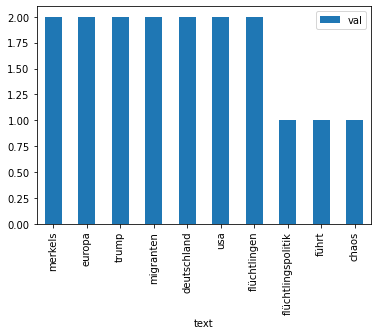

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(counts, #this is what we want to visualize
             columns=['text','val']).set_index('text').plot(kind='bar');


Sources

http://introtopython.org/dictionaries.html#Looping-through-a-dictionary